<a href="https://colab.research.google.com/github/karanrp813/health-trend-spotter/blob/main/fake_news_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the Kaggle library
!pip install kaggle

# Upload your Kaggle API key
from google.colab import files
files.upload()

# Make a directory for Kaggle and move the API key there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# Unzip the dataset
!unzip fake-and-real-news-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.33GB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Load the datasets
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Add a 'label' column to identify fake (1) and real (0) news
df_fake['label'] = 1
df_true['label'] = 0

# Combine the two dataframes
df = pd.concat([df_fake, df_true], ignore_index=True)

print("Data loaded and combined successfully!")
df.head()

Data loaded and combined successfully!


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


label
1    23481
0    21417
Name: count, dtype: int64


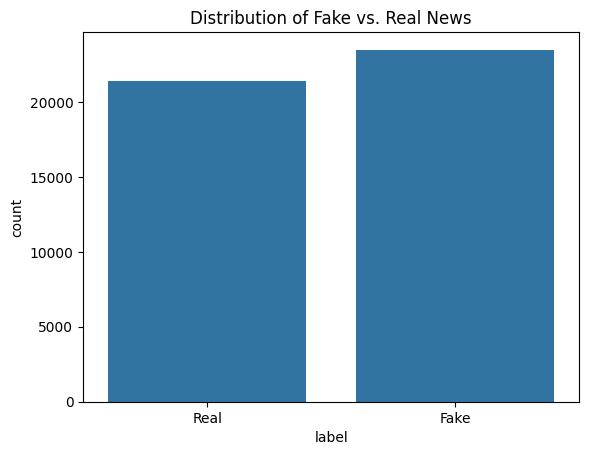

In [ ]:
# Visualize the distribution of fake and real news
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake vs. Real News')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

In [ ]:
# Combine the title and text columns into a single 'content' column
df['content'] = df['title'] + ' ' + df['text']

In [ ]:
# Download stopwords
nltk.download('stopwords')

# Initialize the Porter Stemmer and stopwords
port_stem = PorterStemmer()
stop_words = stopwords.words('english')

def preprocess_text(content):
    # Keep only alphabetic characters
    stemmed_content = re.sub('[^a-zA-Z]',' ', content)
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    # Split into words
    stemmed_content = stemmed_content.split()
    # Remove stopwords and apply stemming
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stop_words]
    # Join words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

# Apply the preprocessing function to our content
df['stemmed_content'] = df['content'].apply(preprocess_text)

print("Text preprocessing complete!")
print("Original:\n", df['content'][0])
print("\nCleaned:\n", df['stemmed_content'][0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text preprocessing complete!
Original:
  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president

In [ ]:
# Separate the data and labels
X = df['stemmed_content'].values
y = df['label'].values

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we'll only consider the top 5000 most frequent words
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(X)

# Transform the text data into numerical vectors
X = vectorizer.transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Data split into training and testing sets!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Data split into training and testing sets!
Training data shape: (35918, 5000)
Testing data shape: (8980, 5000)


In [ ]:
# Initialize a PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50)

# Train the model
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


Model Accuracy: 99.40%
Confusion Matrix:
 [[4237   30]
 [  24 4689]]


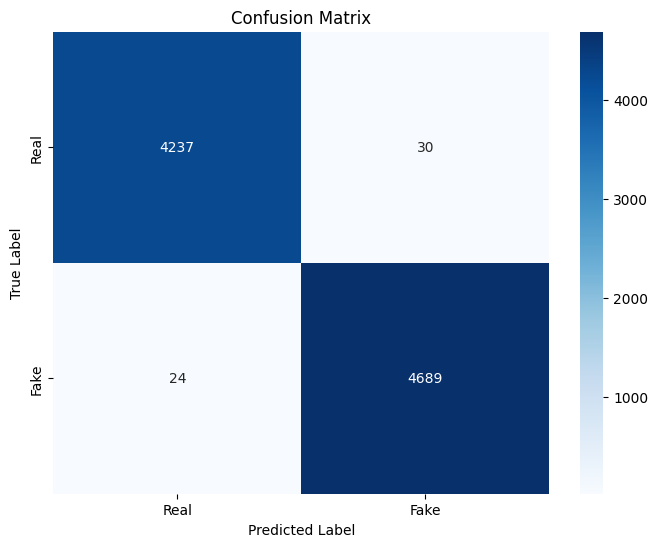

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Install the gradio library
!pip install gradio -q

In [ ]:
import gradio as gr

# This function will take raw text and output a prediction
def predict_news(text):
    # The 'content' for the function is the raw text input
    # 1. Preprocess the text
    processed_text = preprocess_text(text)

    # 2. Vectorize the preprocessed text using the FITTED vectorizer
    # We use vectorizer.transform, NOT vectorizer.fit_transform
    vectorized_text = vectorizer.transform([processed_text])

    # 3. Predict using the TRAINED model
    prediction = model.predict(vectorized_text)

    # 4. Return the human-readable result
    if prediction[0] == 1:
        return "🚨 Fake News"
    else:
        return "✅ Real News"

# Let's test the function with an example
# Example taken from the dataset to verify
sample_text = df['content'][10] # This is a known fake news article from our dataset
print(f"Sample Text: '{sample_text[:100]}...'")
print(f"Prediction: {predict_news(sample_text)}")

Sample Text: ' Papa John’s Founder Retires, Figures Out Racism Is Bad For Business A centerpiece of Donald Trump s...'
Prediction: 🚨 Fake News


In [ ]:
# Create the Gradio interface
interface = gr.Interface(fn=predict_news,
                         inputs=gr.Textbox(lines=10, placeholder="Paste the full news article text here..."),
                         outputs=gr.Label(label="Prediction"),
                         title="📰 Fake News Detector",
                         description="An AI-powered tool to help you distinguish between real and fake news. Paste an article's text to check its credibility.",
                         examples=[
                             ["The Centers for Disease Control and Prevention is advising Americans to prepare for the possibility of a COVID-19 outbreak in the United States, officials said Tuesday."],
                             ["BREAKING: Mueller Deputy Walks Out Of Trump Hearing In Disgust (VIDEO)"]
                         ])

# Launch the app!
# The share=True argument creates a public, shareable link.
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2acf887d94b7d8cc7f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import joblib

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

# Save the model
joblib.dump(model, 'model.pkl')

# Download the files to your local machine
from google.colab import files
files.download('vectorizer.pkl')
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>